In [1]:
import numpy as np
import pandas as pd
import datetime
import warnings #경고문 X
warnings.filterwarnings('ignore') # 경고문 X

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.font_manager as fm ### 한글 폰트 깨지는 것 방지        
plt.rc('font', family='NanumGothic') # 네이버 나눔 폰트 설치 해야함
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False ###
# import matplotlib
# matplotlib.font_manager._rebuild() ### 최초 폰트 설치시 적용해야함

In [4]:
df = pd.read_csv('data/daily_futures.csv')
index = pd.read_csv('data/index_merge.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 40 columns):
일자        4642 non-null object
시가        4642 non-null float64
고가        4642 non-null float64
저가        4642 non-null float64
종가        4642 non-null float64
등락        4642 non-null int64
종가변화      4642 non-null float64
등락률       4642 non-null float64
거래량       4642 non-null int64
미결제       4642 non-null int64
증감        4642 non-null int64
거래대금      4642 non-null float64
코스피200    4642 non-null float64
등락.1      4642 non-null int64
현물변화      4642 non-null float64
Basis     4642 non-null float64
연도        4642 non-null int64
월         4642 non-null int64
일         4642 non-null int64
요일        4642 non-null int64
5MA       4642 non-null float64
10MA      4642 non-null float64
15MA      4642 non-null float64
20MA      4642 non-null float64
25MA      4642 non-null float64
30MA      4642 non-null float64
35MA      4642 non-null float64
40MA      4642 non-null float64
45MA      4642 n

In [6]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3827 entries, 0 to 3826
Data columns (total 17 columns):
date             3827 non-null object
fa_num_rate      3827 non-null float64
fa_Votes_rate    3827 non-null float64
time_Allday      3827 non-null float64
time_Event       3827 non-null float64
time_month       3827 non-null float64
time_Quarter     3827 non-null float64
USD              3827 non-null float64
EUR              3827 non-null float64
GBP              3827 non-null float64
JPY              3827 non-null float64
AUD              3827 non-null float64
CAD              3827 non-null float64
NZD              3827 non-null float64
CNY              3827 non-null float64
CHF              3827 non-null float64
All              3827 non-null float64
dtypes: float64(16), object(1)
memory usage: 508.4+ KB


In [7]:
index.rename(columns = {'date' : '일자'}, inplace = True)
df['일자'] = df['일자'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
index['일자'] = index['일자'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [8]:
df_index = df.merge(index, on = ['일자'])

In [9]:
df_index.set_index('일자', inplace = True)

In [10]:
df_index['타겟변수3'] = df_index['타겟변수3'].astype(int)

In [11]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2964 entries, 2007-01-02 to 2018-12-26
Data columns (total 55 columns):
시가               2964 non-null float64
고가               2964 non-null float64
저가               2964 non-null float64
종가               2964 non-null float64
등락               2964 non-null int64
종가변화             2964 non-null float64
등락률              2964 non-null float64
거래량              2964 non-null int64
미결제              2964 non-null int64
증감               2964 non-null int64
거래대금             2964 non-null float64
코스피200           2964 non-null float64
등락.1             2964 non-null int64
현물변화             2964 non-null float64
Basis            2964 non-null float64
연도               2964 non-null int64
월                2964 non-null int64
일                2964 non-null int64
요일               2964 non-null int64
5MA              2964 non-null float64
10MA             2964 non-null float64
15MA             2964 non-null float64
20MA             2964 non-null floa

In [12]:
df_index.head().transpose()

일자,2007-01-02 00:00:00,2007-01-03 00:00:00,2007-01-04 00:00:00,2007-01-05 00:00:00,2007-01-08 00:00:00
시가,1.878500e+02,1.877000e+02,1.838500e+02,1.815000e+02,1.788500e+02
고가,1.879000e+02,1.880000e+02,1.840500e+02,1.821500e+02,1.801000e+02
저가,1.864500e+02,1.834000e+02,1.807000e+02,1.784500e+02,1.776500e+02
종가,1.870000e+02,1.840000e+02,1.817000e+02,1.795500e+02,1.778500e+02
등락,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
종가변화,2.000000e-01,-3.000000e+00,-2.300000e+00,-2.150000e+00,-1.700000e+00
등락률,1.100000e-01,-1.600000e+00,-1.250000e+00,-1.180000e+00,-9.500000e-01
거래량,1.052260e+05,1.838510e+05,2.135260e+05,2.496350e+05,1.988990e+05
미결제,8.814500e+04,8.736000e+04,9.009700e+04,8.931000e+04,9.094900e+04
증감,1.540000e+02,-7.850000e+02,2.737000e+03,-7.870000e+02,1.639000e+03


## Modeling

In [13]:
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

C:\Users\veror\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
# 3개의 타겟(-1, 0, 1)

df_index['타겟변수3'] = df_index['타겟변수3'].astype(str)

X = df_index.drop(['타겟변수5', '타겟변수2', '종가예측', '타겟변수3'], axis=1)
y = df_index['타겟변수3']
X_train = X[:2070] # 전체 rows의 70퍼센트
X_test = X[2070:]
y_train = y[:2070]
y_test = y[2070:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
print("X_train: {}".format(str(X_train_scaled.shape))+'\n'+
      "y_train: {}".format(str(y_train.shape))+'\n'+
      "X_test: {}".format(str(X_test_scaled.shape))+'\n'+
      "y_test: {}".format(str(y_test.shape)))

X_train: (2070, 51)
y_train: (2070,)
X_test: (894, 51)
y_test: (894,)


### Decision Tree

In [23]:
dtc1 = DecisionTreeClassifier(random_state=0)
dtc1 = dtc1.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(dtc1.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(dtc1.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.359
테스트 세트 정확도: 0.428


In [24]:
# 과적합되었기 때문에 depth를 설정해줍니다.

dtc2 = DecisionTreeClassifier(max_depth=4, random_state=0)
dtc2 = dtc2.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(dtc2.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(dtc2.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.359
테스트 세트 정확도: 0.428


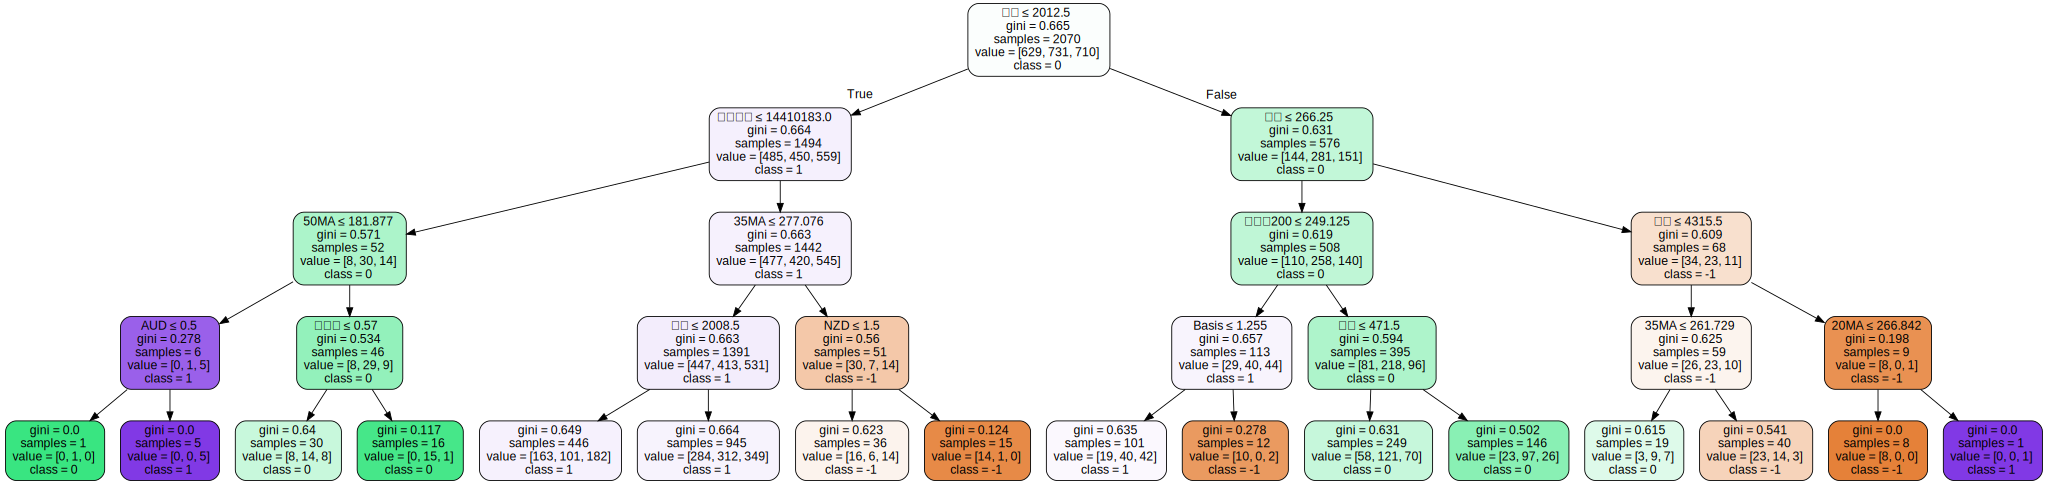

In [25]:
# Decision Tree 결과의 시각화

feature_names = df_index.columns.values.tolist()

del feature_names[feature_names.index('종가예측')]
del feature_names[feature_names.index('타겟변수5')]
del feature_names[feature_names.index('타겟변수3')]
del feature_names[feature_names.index('타겟변수2')]

target_names = np.array(['-1', '0', '1'])

dot_data = tree.export_graphviz(dtc2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("futures_dtc") 

dot_data = tree.export_graphviz(dtc2, out_file=None, 
                      feature_names=feature_names,  
                      class_names=target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  


graph 

### RandomForest

In [26]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=4, min_samples_split=3, random_state=0)
rfc.fit(X_train_scaled, y_train)
y_pred=rfc.predict(X_test_scaled)

print("훈련 세트 정확도: {:.3f}".format(rfc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rfc.score(X_test_scaled, y_test)))

rfc_scores=cross_val_score(rfc, X_train_scaled, y_train, cv=5)
print(rfc_scores)
print("accuracy 평균 점수는 %.2f" %np.mean(rfc_scores),"+/- %.2f"%np.std(rfc_scores))
print(classification_report(y_test, y_pred))

훈련 세트 정확도: 0.485
테스트 세트 정확도: 0.353
[0.34457831 0.17149758 0.15458937 0.29227053 0.3535109 ]
accuracy 평균 점수는 0.26 +/- 0.08
             precision    recall  f1-score   support

         -1       0.32      0.28      0.30       230
          0       0.47      0.33      0.39       400
          1       0.29      0.45      0.35       264

avg / total       0.38      0.35      0.36       894



### GradientBoosting

In [27]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train_scaled, y_train)
y_pred = gbrt.predict(X_test_scaled)

print("훈련 세트 점수: {:.2f}".format(gbrt.score(X_train_scaled, y_train)))
print("테스트 세트 점수: {:.2f}".format(gbrt.score(X_test_scaled, y_test)))

gbrt_scores=cross_val_score(gbrt, X_train_scaled, y_train, cv=5)
print(gbrt_scores)
print("accuracy 평균 점수는 %.2f" %np.mean(gbrt_scores),"+/- %.2f"%np.std(gbrt_scores))
print(classification_report(y_test, y_pred))

훈련 세트 점수: 0.48
테스트 세트 점수: 0.35
[0.34698795 0.17149758 0.1763285  0.23671498 0.3535109 ]
accuracy 평균 점수는 0.26 +/- 0.08
             precision    recall  f1-score   support

         -1       0.30      0.27      0.28       230
          0       0.49      0.38      0.43       400
          1       0.27      0.40      0.32       264

avg / total       0.38      0.35      0.36       894



### SVC

In [22]:
# 데이터 10만건 이하 -> SVC 이용
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(kernel='rbf', C=1000, gamma=0.01)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

print("훈련 세트 점수: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 점수: {:.2f}".format(svc.score(X_test_scaled, y_test)))

svc_scores=cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(svc_scores)
print("accuracy 평균 점수는 %.2f" %np.mean(svc_scores),"+/- %.2f"%np.std(svc_scores))
print(classification_report(y_test, y_pred))

훈련 세트 점수: 0.54
테스트 세트 점수: 0.43
[0.33253012 0.17391304 0.27294686 0.34057971 0.36077482]
accuracy 평균 점수는 0.30 +/- 0.07
             precision    recall  f1-score   support

         -1       0.31      0.27      0.29       230
          0       0.48      0.79      0.59       400
          1       0.32      0.03      0.06       264

avg / total       0.39      0.43      0.36       894



### LightGBM

In [29]:
#시작부분 코드
import time
start_time = time.time() 
#------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

warnings.filterwarnings('ignore') # 경고문 X

lgbm=lgb.LGBMClassifier(n_estimators=1000, class_weight="balanced", reg_alpha=0.1, reg_lambda=0.1, learning_rate=0.001, num_leaves=400,
                        random_state=523, boosting='dart')
lgbm_scores=cross_val_score(lgbm, X_train_scaled, y_train, cv=10)
print(lgbm_scores)
print("accuracy 평균 점수는 %.2f" %np.mean(lgbm_scores),"+/- %.2f"%np.std(lgbm_scores))

lgbm.fit(X_train_scaled, y_train)
y_pred=lgbm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
#----------------------------
#종료부분 코드
print("--- %s seconds ---" %(time.time() - start_time))

[0.34615385 0.27536232 0.09661836 0.00483092 0.06763285 0.04347826
 0.16425121 0.10144928 0.04347826 0.33009709]
accuracy 평균 점수는 0.15 +/- 0.12
             precision    recall  f1-score   support

         -1       0.26      0.39      0.31       230
          0       0.47      0.31      0.37       400
          1       0.30      0.32      0.31       264

avg / total       0.37      0.33      0.34       894

--- 564.161872625351 seconds ---


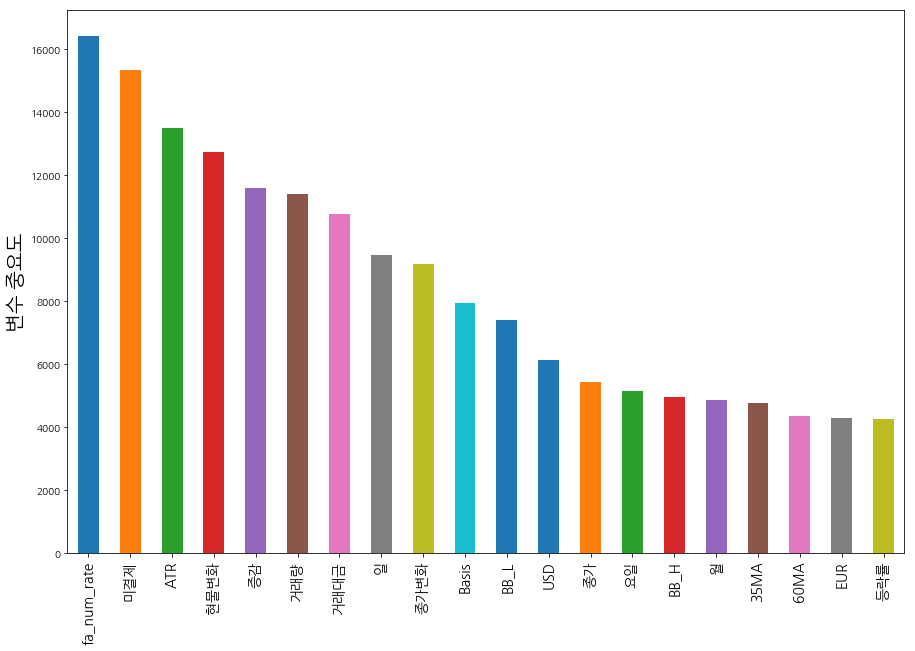

In [30]:
fi=pd.Series(dict(zip(X_test.columns,lgbm.feature_importances_)))
plt.figure(figsize=(15,10))
plt.ylabel("변수 중요도", fontsize=20)
plt.xticks(fontsize=14, rotation=90)
fi.nlargest(20).plot(kind="bar");

## Deep Learning(Keras)

In [30]:
import keras
import tensorflow as tf

from sklearn.preprocessing import minmax_scale
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.utils import np_utils
from keras import regularizers

Using TensorFlow backend.


In [31]:
X = df_index.drop(['타겟변수5', '타겟변수2', '종가예측', '타겟변수3'], axis=1)
y = df_index['타겟변수3']

X_train = X[:2370] # 전체 rows의 80퍼센트
X_test = X[2370:]
y_train = y[:2370]
y_test = y[2370:]

x_train = X_train.astype(np.float64).values
x_test = X_test.astype(np.float64).values

Y_train = np.array(y_train)
Y_test = np.array(y_test)

x_val = x_train[1780:]
Y_val = Y_train[1780:]
x_train = x_train[:1780]
Y_train = Y_train[:1780]

Y_train = np_utils.to_categorical(Y_train, num_classes=5)
Y_val = np_utils.to_categorical(Y_val, num_classes=5)
Y_test = np_utils.to_categorical(Y_test, num_classes=5)

print(x_train.shape)
print(Y_train.shape)

(1780, 51)
(1780, 5)


In [32]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

### Convolution

In [33]:
model = Sequential()

model.add(Dense(30, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

conv = model.fit(x_train, Y_train, epochs=200, batch_size=128, validation_data=(x_val, Y_val), verbose=0)

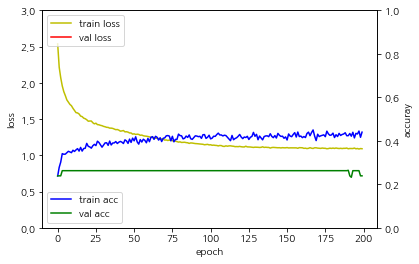

In [34]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(conv.history['loss'], 'y', label='train loss')
loss_ax.plot(conv.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(conv.history['acc'], 'b', label='train acc')
acc_ax.plot(conv.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [35]:
loss_and_metrics = model.evaluate(x_test, Y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

594/594 [==============================] - 0s 67us/step
## evaluation loss and_metrics ##
[1.1567032168609928, 0.3703703705710594]


(1780, 51)
(1780,)


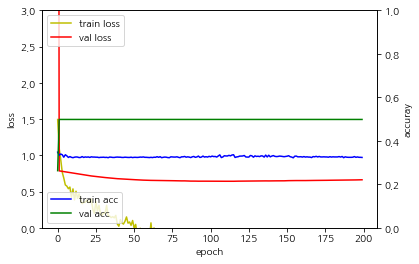

In [36]:
X = df_index.drop(['타겟변수5', '타겟변수2', '종가예측', '타겟변수3'], axis=1)
y = df_index['타겟변수3']

X_train = X[:2370] # 전체 rows의 80퍼센트
X_test = X[2370:]
y_train = y[:2370]
y_test = y[2370:]

x_train = X_train.astype(np.float64).values
x_test = X_test.astype(np.float64).values

Y_train = np.array(y_train)
Y_test = np.array(y_test)

x_val = x_train[1780:]
Y_val = Y_train[1780:]
x_train = x_train[:1780]
Y_train = Y_train[:1780]

Y_train = np.asarray(Y_train).astype('float32')
Y_val = np.asarray(Y_val).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

print(x_train.shape)
print(Y_train.shape)

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

###

model = Sequential()

model.add(Dense(30, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001, 0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

conv = model.fit(x_train, Y_train, epochs=200, batch_size=128, validation_data=(x_val, Y_val), verbose=0)

###

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(conv.history['loss'], 'y', label='train loss')
loss_ax.plot(conv.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(conv.history['acc'], 'b', label='train acc')
acc_ax.plot(conv.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [37]:
loss_and_metrics = model.evaluate(x_test, Y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

594/594 [==============================] - 0s 62us/step
## evaluation loss and_metrics ##
[1.0392615618529144, 0.4377104381118158]


In [38]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

### LSTM

In [42]:
model.reset_states()

model = Sequential()
model.add(Embedding(15000, 128, input_length=51))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm = model.fit(x_train, Y_train, epochs=100, batch_size=1000, validation_data=(x_val, Y_val))

ValueError: Error when checking target: expected dense_10 to have shape (3,) but got array with shape (1,)

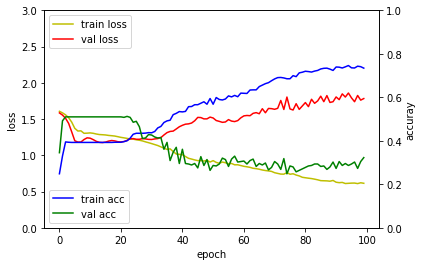

In [42]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(lstm.history['loss'], 'y', label='train loss')
loss_ax.plot(lstm.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(lstm.history['acc'], 'b', label='train acc')
acc_ax.plot(lstm.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [43]:
loss_and_metrics = model.evaluate(x_test, Y_test, batch_size=100)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

443/443 [==============================] - 0s 615us/step
## evaluation loss and_metrics ##
[2.892630451958013, 0.32279909282720926]


### Convolution + LSTM

In [47]:
model.reset_states()

model = Sequential()
model.add(Embedding(15000, 128, input_length=22))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

conLSTM = model.fit(x_train, Y_train, epochs=100, batch_size=10, validation_data=(x_val, Y_val))

Train on 1332 samples, validate on 443 samples
Epoch 1/100
1332/1332 [==============================] - 10s 8ms/step - loss: 1.3332 - acc: 0.3874 - val_loss: 1.1947 - val_acc: 0.5102
Epoch 2/100
1332/1332 [==============================] - 7s 5ms/step - loss: 1.2674 - acc: 0.4062 - val_loss: 1.2492 - val_acc: 0.3115
Epoch 3/100
1332/1332 [==============================] - 7s 6ms/step - loss: 1.2271 - acc: 0.4204 - val_loss: 1.2465 - val_acc: 0.3792
Epoch 4/100
1332/1332 [==============================] - 8s 6ms/step - loss: 1.1327 - acc: 0.4947 - val_loss: 1.3587 - val_acc: 0.3589
Epoch 5/100
1332/1332 [==============================] - 8s 6ms/step - loss: 0.9135 - acc: 0.6276 - val_loss: 1.4428 - val_acc: 0.3160
Epoch 6/100
1332/1332 [==============================] - 7s 6ms/step - loss: 0.7661 - acc: 0.6832 - val_loss: 1.4475 - val_acc: 0.3386
Epoch 7/100
1332/1332 [==============================] - 7s 6ms/step - loss: 0.6666 - acc: 0.7162 - val_loss: 1.6057 - val_acc: 0.3183
Epoch 8

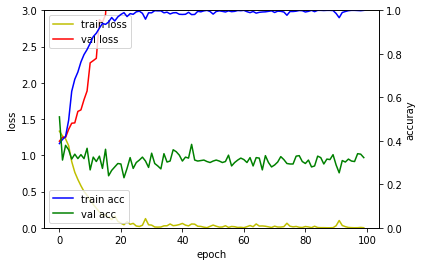

In [48]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(conLSTM.history['loss'], 'y', label='train loss')
loss_ax.plot(conLSTM.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(conLSTM.history['acc'], 'b', label='train acc')
acc_ax.plot(conLSTM.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [46]:
loss_and_metrics = model.evaluate(x_test, Y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

443/443 [==============================] - 0s 250us/step
## evaluation loss and_metrics ##
[5.329053386877676, 0.31828442296648135]
